\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

1.) Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

I still use the method discussed in the lecture. But change the velocity term (vel) to U(x,t).

I set initial condition as
\begin{eqnarray}
U(x,0)=0.2+0.8\times e^{-0.5x^2}
\end{eqnarray}

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


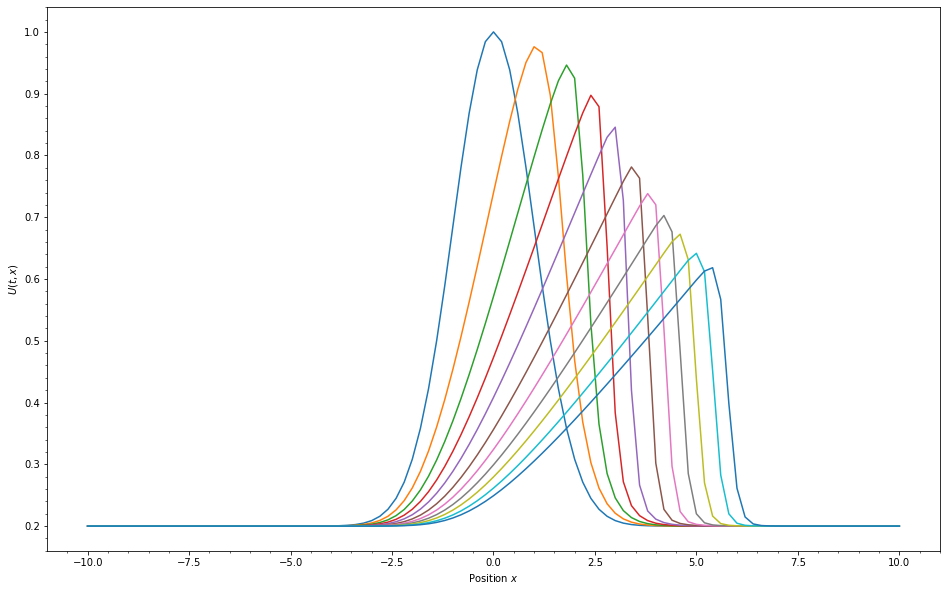

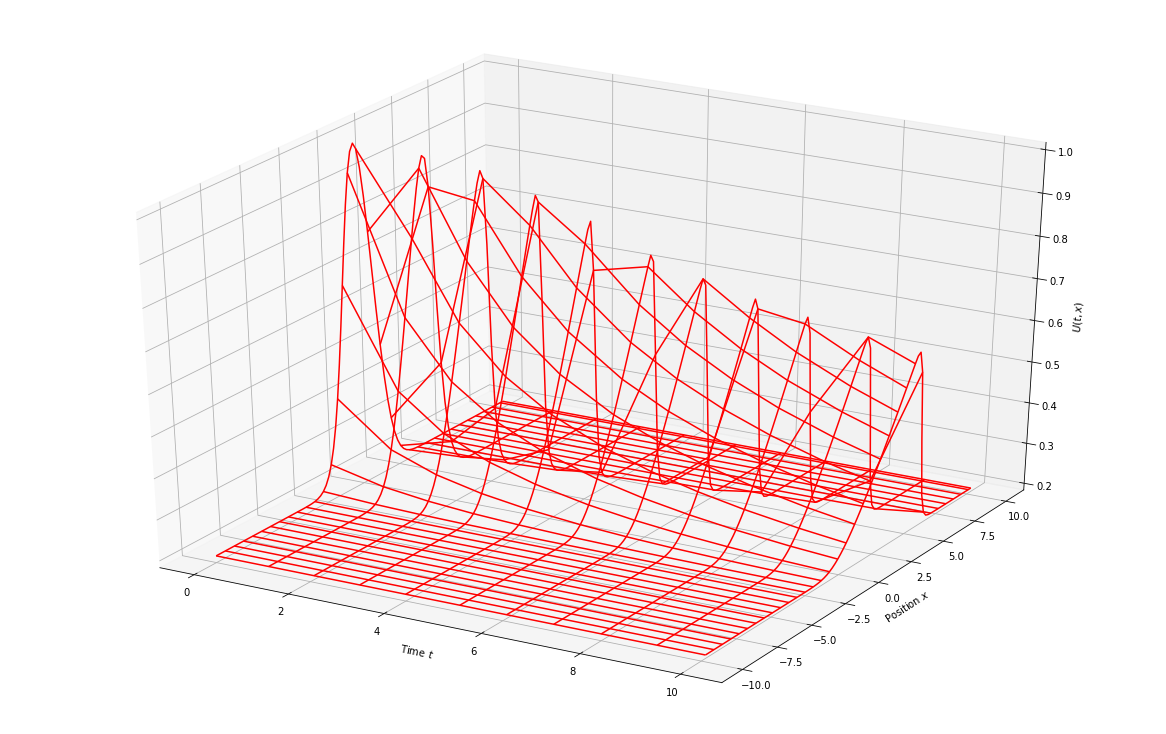

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs


# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    vel = np.copy(U)

    # Find the state at the next time step.
    #U[0]=Uold[-2]
    #U[-1]=Uold[1]
    for ix in range(1, Nx - 1):
        if vel[ix]>0:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
        else:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

#ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

2.) Let's write periodic boundary condition allowing the wave propagating from the right to the left or left to the right and run the code for longer tend. (hint: after each timestep, set quantities at the leftmost grid the same as quantities at the second to the rightmost grids U[0]=U[-2]; set quantities at the rightmost grid the same as quantities at the second to the leftmost grids.)

After each timestep, we set U[0]=U[-2] and U[-1]=U[1].

t =  2.080000000000001
t =  4.000000000000003
t =  6.0800000000000045
t =  8.000000000000005
t =  10.080000000000007
t =  12.000000000000009
t =  14.08000000000001
t =  16.00000000000001
t =  18.080000000000013
t =  20.000000000000014
t =  22.080000000000016
t =  24.000000000000018
t =  26.08000000000002
t =  28.00000000000002
t =  30.080000000000023
t =  32.00000000000002
t =  34.07999999999998
t =  36.15999999999993
t =  38.07999999999989
t =  40.15999999999985
Done.


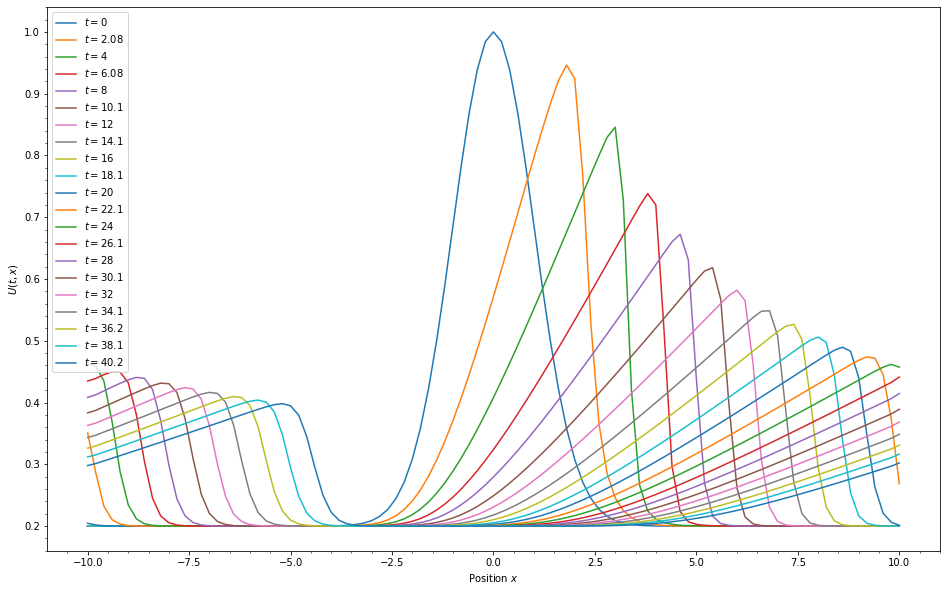

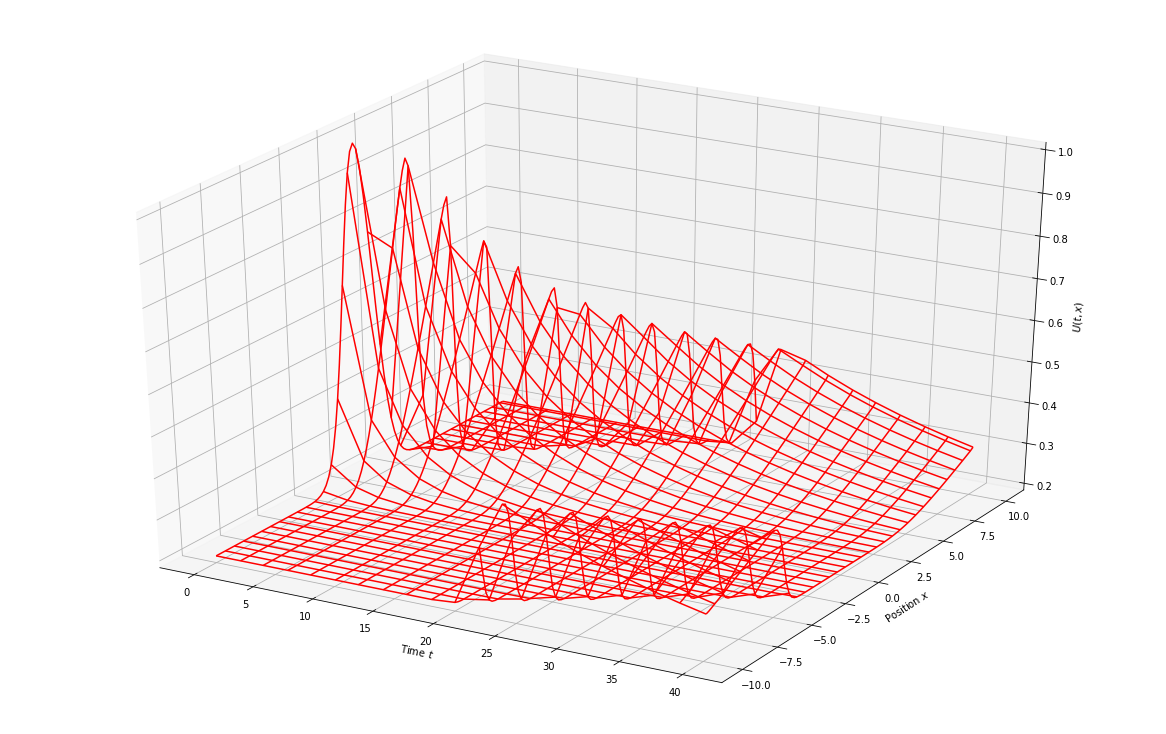

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 2.0   # time interval for outputs


# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    vel = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel[ix]>0:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
        else:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout
    U[0]=U[-2]
    U[-1]=U[1]
ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

3.) Please experiment with different grid sizes.

1, Change the value of Nx to get more precise results

2, change the value of dt to find the unstable criteria ($dt > {dx \over v}$)

t =  2.0000000000000013
t =  4.000000000000003
t =  6.000000000000004
t =  8.000000000000005
t =  10.000000000000007
t =  12.000000000000009
t =  14.00000000000001
t =  16.00000000000001
t =  18.01599999999979
t =  20.01599999999957
t =  22.015999999999348
t =  24.015999999999128
t =  26.015999999998908
t =  28.015999999998687
t =  30.015999999998467
t =  32.01599999999825
t =  34.01599999999803
t =  36.01599999999781
t =  38.01599999999759
t =  40.01599999999737
Done.


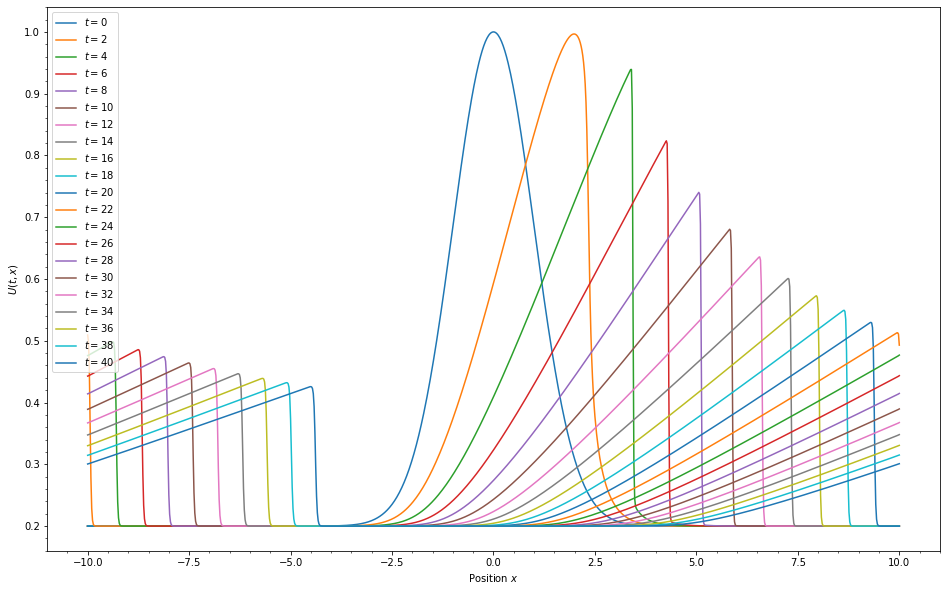

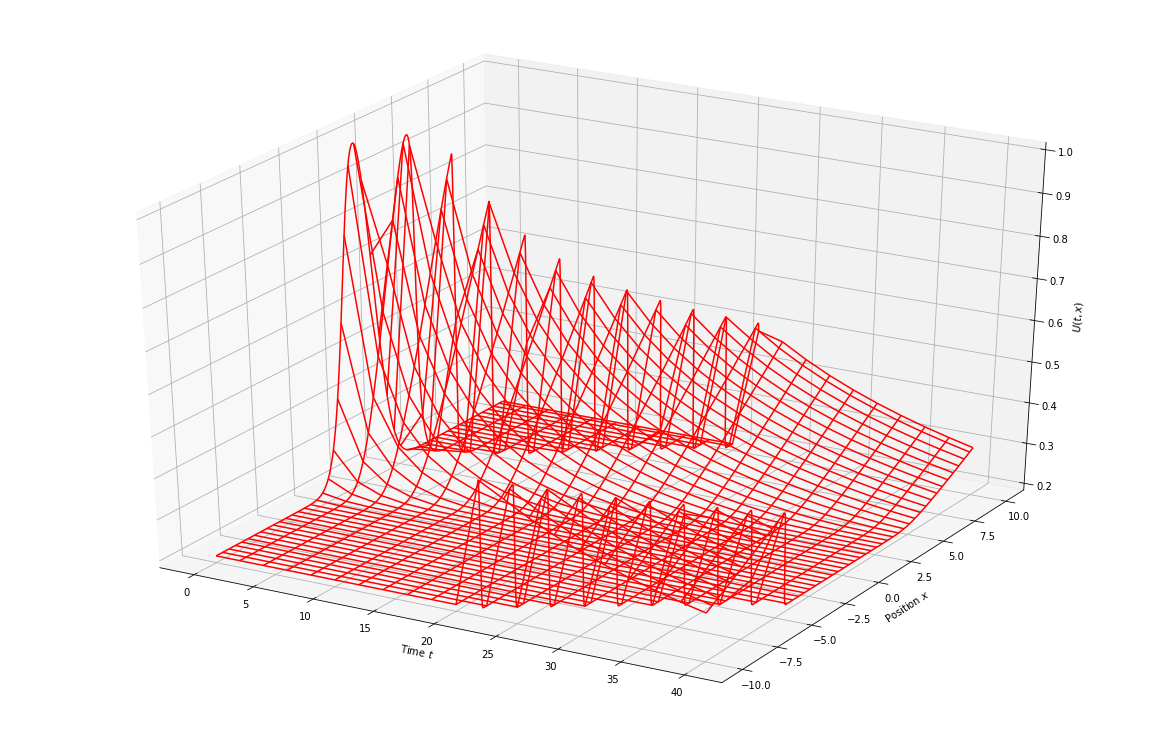

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 2.0   # time interval for outputs


# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    vel = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel[ix]>0:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
        else:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout
    U[0]=U[-2]
    U[-1]=U[1]
ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

t =  2.0160000000000013
t =  4.008000000000003
t =  6.000000000000004


/Users/shunkeai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
/Users/shunkeai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
/Users/shunkeai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/Users/shunkeai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


t =  8.016000000000005
t =  10.007999999999933
t =  12.02399999999986
t =  14.015999999999789
t =  16.00799999999972
t =  18.023999999999795
t =  20.01599999999987
t =  22.007999999999946
t =  24.00000000000002
t =  26.016000000000098
t =  28.008000000000173
t =  30.00000000000025
t =  32.016000000000325
t =  34.0080000000004
t =  36.000000000000476
t =  38.01600000000055
t =  40.00800000000063
Done.


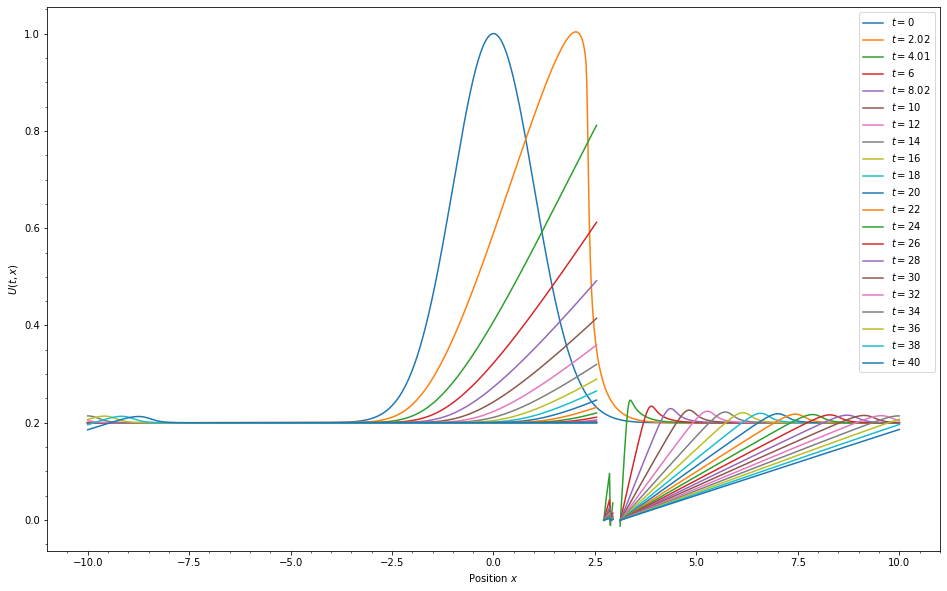

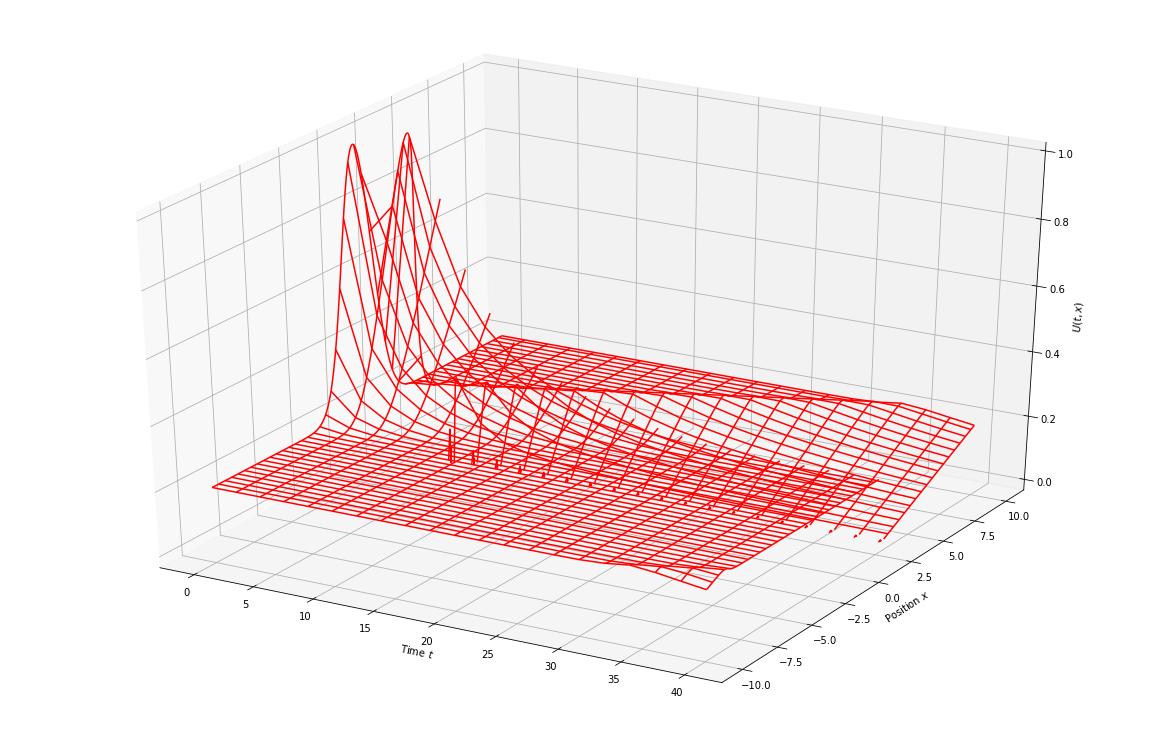

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1001      # number of grid points (including boundary)
tend = 40.0    # end time
dtout = 2.0   # time interval for outputs


# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 1.2*dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)


# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    vel = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        if vel[ix]>0:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
        else:
            U[ix]=Uold[ix]-(vel[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout
    U[0]=U[-2]
    U[-1]=U[1]
ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()